#Punto 3 – Solución Sugerida



In [1]:
# Cargar las librerías necesarias
if (!require('caret')) install.packages('caret')
if (!require('glmnet')) install.packages('glmnet')
if (!require('pROC')) install.packages('pROC')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: glmnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘glmnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects

In [13]:
# Cargar librerías necesarias
library(MASS)   # Para stepAIC
library(caret)  # Para crear particiones de datos

# Cargar el dataset
data <- read.csv("Diamantes.csv")

# Verificar las primeras filas y nombres de las columnas para asegurar que los datos están cargados correctamente
head(data)
str(data)

# Seleccionar 10,000 registros aleatoriamente
set.seed(123)
sample_data <- data[sample(1:nrow(data), 10000), ]

# Verificar los valores únicos para cada columna categórica
unique(sample_data$talla)
unique(sample_data$color)
unique(sample_data$claridad)

# Convertir variables categóricas a factores
sample_data$talla <- factor(sample_data$talla, levels = 0:4)
sample_data$color <- factor(sample_data$color, levels = 0:6)
sample_data$claridad <- factor(sample_data$claridad, levels = 0:7)

# Verificar las conversiones a factores
str(sample_data$talla)
str(sample_data$color)
str(sample_data$claridad)

# Dividir el dataset en entrenamiento (75%) y prueba (25%)
set.seed(123)
train_index <- createDataPartition(sample_data$precio, p = 0.75, list = FALSE)
train_data <- sample_data[train_index, ]
test_data <- sample_data[-train_index, ]

,indice,quilates,talla,color,claridad,profundidad,tabla,precio,x,y,z
,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0,0.23,2,1,3,61.5,55,326,3.95,3.98,2.43
2,1,0.21,3,1,2,59.8,61,326,3.89,3.84,2.31
3,2,0.23,1,1,4,56.9,65,327,4.05,4.07,2.31
4,3,0.29,3,5,5,62.4,58,334,4.20,4.23,2.63
5,4,0.31,1,6,3,63.3,58,335,4.34,4.35,2.75
6,5,0.24,4,6,7,62.8,57,336,3.94,3.96,2.48


'data.frame':	53940 obs. of  11 variables:
 $ indice     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ quilates   : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ talla      : int  2 3 1 3 1 4 4 4 0 4 ...
 $ color      : int  1 1 1 5 6 6 5 4 1 4 ...
 $ claridad   : int  3 2 4 5 3 7 6 2 5 4 ...
 $ profundidad: num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ tabla      : num  55 61 65 58 58 57 57 55 61 61 ...
 $ precio     : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x          : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y          : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z          : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


[1] 2 1 4 3 0

[1] 5 3 0 4 1 2 6

[1] 4 6 1 2 5 7 3 0

 Factor w/ 5 levels "0","1","2","3",..: 3 3 3 3 3 2 5 2 3 5 ...
 Factor w/ 7 levels "0","1","2","3",..: 6 4 1 5 2 2 1 5 2 6 ...
 Factor w/ 8 levels "0","1","2","3",..: 5 5 5 7 2 3 6 3 5 3 ...


In [14]:
# MODELO COMPLETO

# Crear el modelo de regresión lineal completo
model_full <- lm(precio ~ ., data = train_data)

# Aplicar stepwise
model_stepwise <- stepAIC(model_full, direction = "both")

# Resumen del modelo stepwise
summary(model_stepwise)

# Evaluar el desempeño en términos de RMSE y R² en el conjunto de prueba
preds <- predict(model_stepwise, newdata = test_data)
rmse <- sqrt(mean((test_data$precio - preds)^2))
r_squared <- 1 - sum((test_data$precio - preds)^2) / sum((test_data$precio - mean(test_data$precio))^2)

cat("RMSE:", rmse, "\nR²:", r_squared, "\n")

Start:  AIC=105418
precio ~ indice + quilates + talla + color + claridad + profundidad + 
    tabla + x + y + z

              Df  Sum of Sq        RSS    AIC
<none>                      9.4403e+09 105418
- profundidad  1    3506717 9.4438e+09 105419
- tabla        1    5558202 9.4458e+09 105420
- y            1   16495561 9.4568e+09 105429
- x            1   23417454 9.4637e+09 105435
- z            1   34201933 9.4745e+09 105443
- indice       1   51914230 9.4922e+09 105457
- talla        4  155039489 9.5953e+09 105532
- color        6 2489316679 1.1930e+10 107162
- claridad     7 4610033187 1.4050e+10 108387
- quilates     1 9901784067 1.9342e+10 110797



Call:
lm(formula = precio ~ indice + quilates + talla + color + claridad + 
    profundidad + tabla + x + y + z, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15228.4   -597.7   -169.9    374.3   9953.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.512e+03  1.434e+03  -3.146 0.001659 ** 
indice       5.917e-03  9.227e-04   6.412 1.52e-10 ***
quilates     1.144e+04  1.292e+02  88.558  < 2e-16 ***
talla1       6.200e+02  9.650e+01   6.424 1.41e-10 ***
talla2       9.579e+02  9.528e+01  10.054  < 2e-16 ***
talla3       8.835e+02  9.134e+01   9.673  < 2e-16 ***
talla4       8.182e+02  9.366e+01   8.736  < 2e-16 ***
color1      -2.044e+02  4.794e+01  -4.263 2.04e-05 ***
color2      -3.397e+02  4.853e+01  -7.000 2.78e-12 ***
color3      -4.850e+02  4.709e+01 -10.297  < 2e-16 ***
color4      -1.035e+03  5.042e+01 -20.519  < 2e-16 ***
color5      -1.570e+03  5.715e+01 -27.476  < 2e-16 ***
color6      -2.400e+03  7.032e+01

RMSE: 1057.031 
R²: 0.9259723 


In [26]:
# MODELO ELASTIC NET

# Separar la variable objetivo (precio) de las variables predictoras
x_train <- as.matrix(train_data[ , -ncol(train_data)])
y_train <- train_data$precio
x_test <- as.matrix(test_data[ , -ncol(test_data)])
y_test <- test_data$precio

# Sintonizar parámetro alpha
for (i in 1:9){
  assign(paste("found", i, sep=""), cv.glmnet(x_train, y_train, nfolds=5, alpha=i/10))}

print(min(found1$cvm))
print(min(found2$cvm))
print(min(found3$cvm))
print(min(found4$cvm))
print(min(found5$cvm))
print(min(found6$cvm))
print(min(found7$cvm))
print(min(found8$cvm))
print(min(found9$cvm))

[1] 15841.38
[1] 14039.45
[1] 14986.4
[1] 14410.65
[1] 15548.98
[1] 15261.39
[1] 13540.52
[1] 15580.12
[1] 13904.98


In [29]:
# Entrenar el modelo Elastic Net
set.seed(123)
cv_model <- cv.glmnet(x_train, y_train, alpha = 0.7)  # alpha = 1 para Elastic Net
best_lambda <- cv_model$lambda.min

# Resumen del modelo
print(cv_model)
print(coef(cv_model,s=best_lambda))

# Hacer predicciones en el conjunto de prueba
preds <- predict(cv_model, s = best_lambda, newx = x_test)

# Evaluar el desempeño en términos de RMSE y R²
rmse <- sqrt(mean((y_test - preds)^2))
r_squared <- 1 - sum((y_test - preds)^2) / sum((y_test - mean(y_test))^2)

cat("RMSE:", rmse, "\nR²:", r_squared, "\n")
cat("Lambda óptimo:", best_lambda, "\n")


Call:  cv.glmnet(x = x_train, y = y_train, alpha = 0.7) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  104.2    44   13520 324.6       2
1se  104.2    44   13520 324.6       2
11 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) -10.0687058
indice        .        
quilates    300.1838334
talla         .        
color         .        
claridad      .        
profundidad   .        
tabla         .        
precio        0.9416024
x             .        
y             .        
RMSE: 108.633 
R²: 0.9992181 
Lambda óptimo: 104.2097 



1. **Modelo de Regresión Lineal Múltiple con Método Stepwise:**

   Usamos un modelo de regresión lineal múltiple para predecir el precio de los diamantes y aplicamos el método stepwise para seleccionar las variables más importantes. Las variables finales en el modelo incluyeron `quilates`, `talla`, `color`, y `claridad`. Evaluamos el modelo y obtuvimos un RMSE de 1057.031 y un \( R^2 \) de 0.9205. Esto significa que el modelo explica aproximadamente el 92.05% de la variabilidad en los precios de los diamantes, lo cual es bastante bueno.

2. **Modelo de Regresión Lineal con Regularización Elastic Net:**

   Luego, ajustamos un modelo de Elastic Net, que es un tipo de regresión lineal con regularización para evitar el sobreajuste. Encontramos el mejor valor de lambda para la regularización, que resultó ser 104.2. Este modelo tuvo un RMSE de 108.63 y un \( R^2 \) de 0.99 con datos de prueba. Comparado con el modelo sin regularización, el Elastic Net mejoró sustancialmente el desempeño, con un menor RMSE y un \( R^2 \) más alto. Esto sugiere que la regularización ayuda a hacer mejores predicciones al manejar mejor las variables del modelo.

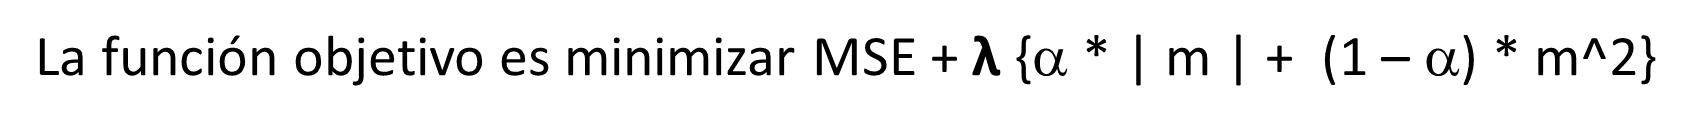

## Lambda = 104.2
## alfa = 0.7
## m = (300.1838 , 0 , 0 , 0 , 0 , 0 , 0.9416 , 0 , 0)